# Text Classification
    It's a techinque to assign one or more categories in to give specific text based on its context. any supervised classsification can be further classified into four categories.
    * Binary
    * Multi class
    * Multi label
    

### Applications
    
    * Content classification and organization
        This refers to the task of classifying/tagging large amounts of textual data.

    * Customer support
        Customers ofter use social media to express their opinions abou service or product. Text classificaio often used to indentify the tweets and brnds must reponsd to and those that don't require response.

    * E-Commerce
        Customer leaves review for a range of products in e-commerce websites. text classification in this kind of undestand and analyze customers's preception of the product and service based commands.

    * Language identification
    * Authorship attribution
    * Segregate fake news from real news.
        

### Pipeline for Text classification
    
    - Collect or create labeled data set
    - Split the dataset into two or three parts. (Training, validation, test) then decide evaluvation metrics
    - Transform raw text into feature vectors
    - Train a classifier using the feature vectors and the correponding label from the training set.
    - Use evavuation metrics, benchmark the model performance on the test set.
    - Deploy the model to serve real world use case.
    

### One pipeline, Many classifiers

In [ ]:
# Economic News Article Tone and Relevance

In [28]:
# IMporting nessary models
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from time import time

In [7]:
data_path = '../data/Full-Economic-News-DFE-839861.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-1')

In [8]:
df.shape

(8000, 15)

In [9]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')

In [10]:
df["relevance"].value_counts()/df.shape[0] #Class distribution in the dataset

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [11]:
# convert label to a numeric variable

df = df[df.relevance != 'not sure']

In [12]:
df.shape

(7991, 15)

In [13]:
df['relevance'] = df.relevance.map({'yes':1, 'no':0})

df = df[["text", "relevance"]]

In [14]:
df.shape

(7991, 2)

In [29]:
def clean(doc): #doc is a string of text
    doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in STOPWORDS])
    #remove punctuation and numbers
    return doc

In [15]:
# Pre processing
from sklearn.model_selection import train_test_split

In [16]:
X = df.text
y = df.relevance

print(X.shape, y.shape)

(7991,) (7991,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5993,) (5993,)
(1998,) (1998,)


In [30]:
vec = CountVectorizer(preprocessor=clean)

X_train_dt = vec.fit_transform(X_train)

X_test_dt = vec.transform(X_test)

In [31]:
print(X_train_dt.shape, X_test_dt.shape)

(5993, 49863) (1998, 49863)


In [32]:
nb = MultinomialNB()

In [35]:
%time nb.fit(X_train_dt, y_train)

Wall time: 66.3 ms


MultinomialNB()

In [36]:
y_pred_class = nb.predict(X_test_dt)

In [39]:
import itertools
from sklearn.metrics import roc_auc_score
import matplotlib as mpl 
import matplotlib.cm as cm 

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    

In [41]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.7772772772772772


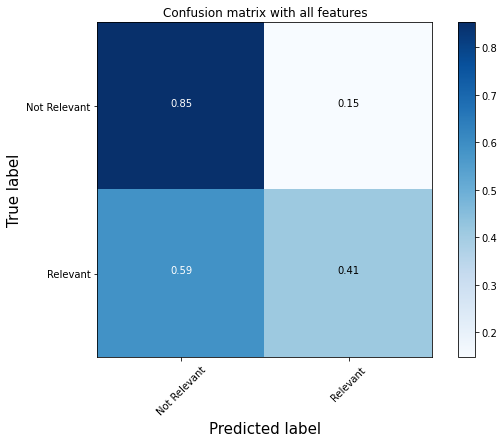

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

In [52]:
y_pred_prob = nb.predict_proba(X_test_dt)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

ROC_AOC_Score:  0.723586214933469


Wall time: 6.64 ms
Accuracy:  0.6876876876876877


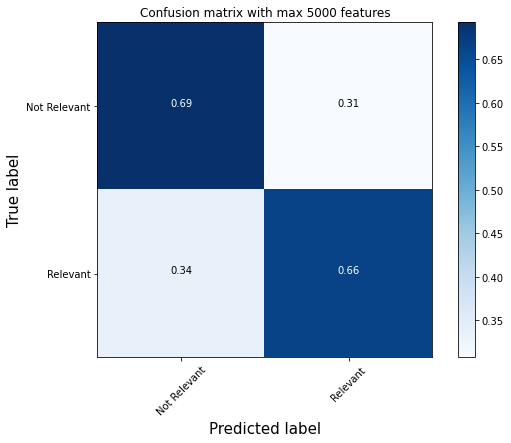

In [53]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) #Step-1
X_train_dt = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dt = vect.transform(X_test)
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dt, y_train)#train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dt)#make class predictions for X_test_dtm
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with max 5000 features')

In [55]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression(class_weight="balanced")

In [57]:
logreg.fit(X_train_dt, y_train)

e:\nlp-tasks\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [58]:
#Make predictions on test data
y_pred_class = logreg.predict(X_test_dt)

Accuracy:  0.7332332332332332
AUC:  0.723586214933469


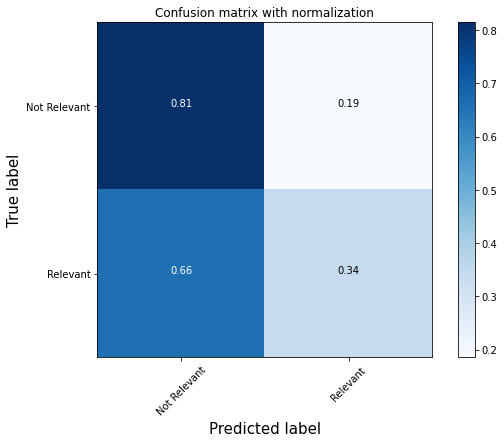

In [59]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

In [60]:
from sklearn.svm import LinearSVC

e:\nlp-tasks\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.6981981981981982
AUC:  0.723586214933469


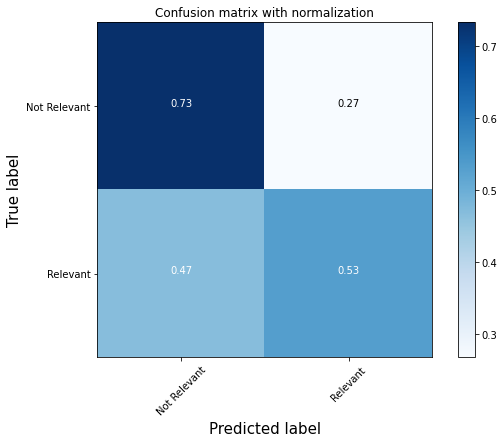

In [61]:
vect = CountVectorizer(preprocessor=clean, max_features=1000) #Step-1
X_train_dt = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dt = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') #instantiate a logistic regression model
classifier.fit(X_train_dt, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = classifier.predict(X_test_dt)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

### Potential reason for poor classification
    * We extracted al possible features, we end up in a large, sparse feature vector, where most features are too rare and end up being noise. sparse feature set also makes training hard
    * There are very few example of some articles and more in some other. the clsss imbalance makes the learning process skewed towards higher data category.
    * Need better learning algorithm.
    * Better pre-processing and feature extraction mechanisam
    * Tuning classifier parameters and hyper parameters.

### Word2Vec for Text Classification
    In recent years neural network based learning of word representation became popular which know as "word embedding". we can use eiter pre defined word embeddings or the custom embedding for the specific domain.

In [62]:
#basic imports
import os
from time import time

#pre-processing imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [63]:
model_path = '../data/GoogleNews-vectors-negative300.bin.gz'

In [64]:
import glob

read_files = glob.glob("../data/sentiment labelled sentences/*.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

In [71]:
data_path = '../data/sentiment_sentences.txt'

In [66]:
%time w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

Wall time: 1min 34s


In [67]:
texts = []
cats = []

In [72]:
fh = open(data_path)
for line in fh:
    text, sentiment = line.split("\t")
    texts.append(text)
    cats.append(sentiment)

In [73]:
# Inspect the model
word2vec_vocab = w2v_model.vocab.keys()
word2vec_vocab_lower = [item.lower() for item in word2vec_vocab]
print(len(word2vec_vocab))

3000000


In [74]:
#Inspect the dataset
print(len(cats), len(texts))
print(texts[1])
print(cats[1])

5000 5000
Good case, Excellent value.
1



In [75]:
#preprocess the text.
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        return [token.lower() for token in tokens if token not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further. 
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

texts_processed = preprocess_corpus(texts)
print(len(cats), len(texts_processed))
print(texts_processed[1])
print(cats[1])

5000 5000
['good', 'case', 'excellent', 'value']
1



In [76]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        feats.append(feat_for_this/count_for_this)        
    return feats


train_vectors = embedding_feats(texts_processed)
print(len(train_vectors))

<ipython-input-76-536a16e998b9>:13: RuntimeWarning: invalid value encountered in true_divide
  feats.append(feat_for_this/count_for_this)


5000


In [78]:
train_vectors[0]

array([-0.02180481, -0.02346802, -0.01232338,  0.07751465, -0.0881958 ,
        0.07093048, -0.01003265, -0.07572937,  0.08233643,  0.05797219,
       -0.07333374, -0.118927  , -0.12268829, -0.08712769, -0.13682556,
        0.06211853,  0.13510132,  0.08915329,  0.03269958, -0.0518837 ,
        0.05072021,  0.11506653,  0.08770752,  0.0460968 ,  0.11599731,
        0.074646  , -0.05322266,  0.00317383,  0.0389595 , -0.00096321,
       -0.03198242,  0.09008789, -0.0819397 , -0.03693771, -0.04135132,
       -0.02497101,  0.02585769, -0.04069519,  0.02770996,  0.07479858,
        0.07942963, -0.01748085,  0.16943741, -0.00860596,  0.01129532,
        0.00712585, -0.04824829, -0.09115255, -0.05767822,  0.        ,
       -0.00839233,  0.04573059,  0.0927887 , -0.04602051,  0.02788544,
       -0.00643921, -0.06173325, -0.0149498 ,  0.08590698,  0.00770569,
       -0.00668335, -0.00933075, -0.10662842, -0.03262329, -0.04525375,
       -0.10090637, -0.10495758,  0.14862061, -0.03874588,  0.02

In [79]:
cats[1]

'1\n'

In [ ]:
#Take any classifier (LogisticRegression here, and train/test it like before.
classifier = LogisticRegression(random_state=1234)
train_data, test_data, train_cats, test_cats = train_test_split(train_vectors, cats)
classifier.fit(train_data, train_cats)
print("Accuracy: ", classifier.score(test_data, test_cats))
preds = classifier.predict(test_data)
print(classification_report(test_cats, preds))

### Sub word embedding and FastText
    One main problem with word embeddings as well other techinque is handling out of vocabulary problem. usually we ignore the such word from feature extraction.
    
    FastText embeddings based on the idea of enriching word embedding  with subword level information. Embedding represent for eah word is represented as a sum of the representations of individual character n-grams. 
    
    * This can handle words that did not appear in training data.
    * The implementation extreamly fast even in larger corpora.
    
    Even though it's general-purpose library it having off the self text classification tp providing end-to-end classifier traning and texting. including feature extraction. 
    
    FastText is suitable to set strong baseline model. One concern in fastText is it's uses pre-trained character n-grams embeddings. so when we save the model it will save the eniter n-gram embedding this will increase the model size.

In [ ]:
## Using fastText for feature extraction and training
from fasttext import train_supervised 
"""fastText expects and training file (csv), a model name as input arguments.
label_prefix refers to the prefix before label string in the dataset.
default is __label__. In our dataset, it is __class__. 
There are several other parameters which can be seen in: 
https://pypi.org/project/fasttext/
"""
model = train_supervised(input='train.csv',
                         label="__label_id__",
                         lr=1.0, epoch=75,
                         loss='ova', wordNgrams=2,
                         dim=200, thread=2, verbose=100)

In [ ]:
for k in range(1,6):
    results = model.test('test.csv',k=k)
    print(f"Test Samples: {results[0]} Precision@{k} : {results[1]*100:2.4f} Recall@{k} : {results[2]*100:2.4f}")

### Document Embedding
    In Doc2Vec scheme we can learn a direct representation for the entire document. rather than each word.

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
X = sample['text_processed']
y = sample['label_id']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [ ]:
#prepare training data in doc2vec format:
train_doc2vec = [TaggedDocument((d), tags=[str(i)]) for i, d in enumerate(X_train)]

In [ ]:
#Train a doc2vec model to learn
model = Doc2Vec(vector_size=50, alpha=0.025, min_count=5, dm =1, epochs=100)
model.build_vocab(train_doc2vec)
model.train(train_doc2vec, total_examples=model.corpus_count, epochs=model.epochs)
model.save("d2v.model")
print("Model Saved")

In [ ]:
#Infer the feature representation for training and test data using the trained model
model= Doc2Vec.load("d2v.model")

In [ ]:
#infer in multiple steps to get a stable representation. 
train_vectors =  [model.infer_vector(list_of_tokens, steps=50) for list_of_tokens in X_train]
test_vectors = [model.infer_vector(list_of_tokens, steps=50) for list_of_tokens in X_test]

In [ ]:
clf = LogisticRegression(class_weight="balanced") #because classes are not balanced. 
clf.fit(train_vectors, y_train)

In [ ]:
preds = clf.predict(test_vectors)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test,preds))

## Deep learning
    Two of the most commonly used neural network architecture for text classification are CNN & RNN. LSTM is popular form of RNN. Recent approcahes involving pre-trained model. transfer learning.
    
    Steps involved in converting traning and test data into suitable format for neural network.
    
    * Tokenize the text and convert into word index vectors
    * Pad the text sequence so that all text vectors are on the same length
    * Map every word index to an embedding vector. we do that by multiplying word index vectors with the embedding matrix. embeding matrix can be pre-trained or trained on the specfic corpous
    * Above step outpput goes as a input of a NN architecture layer.

In [ ]:
#Necessary imports
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Model, Sequential
from keras.initializers import Constant

In [ ]:
# Set path variable for glove encodeing and data set
# https://nlp.stanford.edu/projects/glove/
# https://ai.stanford.edu/~amaas/data/sentiment/

base_dir = "../data"
glove_dir = os.path.join(base_dir, 'glove.6B')
train_dir = os.path.join(base_dir, '/train')
test_dir = os.path.join(base_dir, '/test')

max_seq_length = 1000
max_num_words = 20000
embedding_dim = 100
validation_split = 0.2

#started off from: https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py
#and from: https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

In [ ]:
# Loadin and Preprocessing this changes according to the requirement
def get_data(data_dir):
    try:
        texts = [] # List of samples
        lable_index = {'pos':1, 'neg': 0}
        labels = []
        for name in sorted(os.listdir(data_dir)): # Loop through each file in the directory
            path = os.path.join(data_dir, name) # Create path based on file name
            if os.path.isdir(path): # If specific path exists in the directory
                label_id = labels_index[name]
                for fname in sorted(os.listdir(path)):
                    fpath = os.path(join(path, fname))
                    text = open(fpath).read()
                    texts.append(text)
                    labels.append(label_id)
        return texts, labels
    except:
        return 'failed' 
    

train_texts, train_labels = get_data(train_dir)
test_texts, test_labels = get_data(test_dir)
label_index = {'pos': 1, 'neg': 0}

In [ ]:
# Vectorize these  samples into a 2D integer tensor using Keras Tokenizer
# Tokenizer is fit on training data only, and that is used to tokenize both train and test data.

tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(X_train)

# Converting text to a vector of word indexs
train_sequences = tokenizer.text_to_sequences(train_texts)
test_sequences = tokenizer.text_to_sequences(test_texts)

word_index = tokenizer.word_index

print('Len of Unique tokens:' len(word_index))

In [ ]:
# converting the sequence to fed into NN. Max sequence lenght defined previously
train_valid_data = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data = pad_sequences(test_sequences, maxlen=max_seq_length)

train_valid_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.asarray(test_labels))

# Split training data into trainig set and validataion set
indices = np.arrange(train_valid_data.shape[0])
np.random.shuffle(indices)

train_valid_data = train_valid_data[indices]
train_valid_labels = train_valid_labels[indices]

num_validation_samples = int(validation_split * train_valid_data.shape[0])

X_train = train_valid_data[:num_validation_samples]
y_train = train_valid_data[:num_validation_samples]

x_val = train_valid_data[-num_validation_samples:]
y_val = train_valid_data[-num_validation_samples:]

In [ ]:
# Building index mapping words in embedding set to their embedding vector

embedding_index = {}

with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors in Glove embeddings.' % len(embeddings_index))
#print(embeddings_index["google"])

# prepare embedding matrix - rows are the words from word_index, columns are the embeddings of that word from glove.
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load these pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
print("Preparing of embedding matrix is done")

In [ ]:
# 1D CNN Model with pre-trained embedding
print('Define a 1D CNN model.')

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(x_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(test_data, test_labels)
print('Test accuracy with CNN:', acc)

In [ ]:
# 1D CNN model with training your own embedding
print("Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings")
cnnmodel = Sequential()
cnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(x_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(test_data, test_labels)
print('Test accuracy with CNN:', acc)

In [ ]:
# LSTM Model with training your own embedding
print("Defining and training an LSTM model, training embedding layer on the fly")

#model
rnnmodel = Sequential()
rnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(2, activation='sigmoid'))
rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel.fit(x_train, y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_val, y_val))
score, acc = rnnmodel.evaluate(test_data, test_labels,
                            batch_size=32)

In [ ]:
# LSTM Model using pre-trained Embedding Layer


print("Defining and training an LSTM model, using pre-trained embedding layer")

rnnmodel2 = Sequential()
rnnmodel2.add(embedding_layer)
rnnmodel2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel2.add(Dense(2, activation='sigmoid'))
rnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel2.fit(x_train, y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_val, y_val))
score, acc = rnnmodel2.evaluate(test_data, test_labels,
                            batch_size=32)
print('Test accuracy with RNN:', acc)

LSTM will take longer to run compare to CNN model, Even though LSTM are more powerful in utilizing the sequential nature of text, they're much more data hungry as compared to CNN. The relative lower performance of the LSTM on a dataset need not neccessarily be interpreted as a shortcoming of the model itself. 

### Classification with large pre-trained models

In recent years, there are lot's of improvements in the NN based text-reperesentation. this representation succesfully used in NN models and many of classification tasks. One of such model is called BERT.


DL-based text classifiers are often nothing but
condensed representations of the data they were
trained on. These models are often as good as the
training dataset. Selecting the right dataset becomes
all the more important in such cases.

in most industrial settings, it always makes sense to start with a simpler,
easy-to-deploy approach as your MVP and go from there
incrementally, taking customer needs and feasibility into account.

In [ ]:
#importing a few necessary packages and setting the DATA directory
DATA_DIR="."
import os
import numpy as np
import pickle
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore") 

# install BERT
!pip install pytorch_pretrained_bert pytorch-nlp

# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    torch.cuda.get_device_name(0)

In [ ]:
# uploading the dataset
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("IMDB Dataset.csv",engine='python', error_bad_lines=False)
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

#sentiment is positive and negative we need to convert it to 0,1
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])

In [ ]:

df['sentiment'].value_counts()

In [ ]:
#cleaning the text
from bs4 import BeautifulSoup
import re

def strip(text):
    soup = BeautifulSoup(text, "html.parser")
    text = re.sub('\[[^]]*\]', '', soup.get_text())
    pattern=r"[^a-zA-z0-9\s,']"
    text=re.sub(pattern,'',text)
    return text

df['review']=df['review'].apply(strip)

In [ ]:
df.head()


BERT expects input data in a specific format

We are performing a classification task so we use a special token [CLS] to indicate this to BERT.
It needs to know the end of a sentence so we use the [SEP] token.

In [ ]:
#BERT needs to understand 2 things:
#1) The start and end of each sentiment
# so we declare a special token CLS which tells BERT that its a classification task
sentences = df['review']
sentence = ["[CLS] "+i+" [SEP]" for i in sentences]

In [ ]:
sentence[0]

In [ ]:
# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Restricting the max size of Tokens to 512(BERT doest accept any more than this)
tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:510] , sentence))
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

In [ ]:
labels = list(df['sentiment'])#storing the labels

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128

# Pad our input tokens so that everything has a uniform length
input_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, tokenized_texts)),
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [ ]:
# Select a batch size for training. 
batch_size = 16

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
#Loading pre trained BERT
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)#binary classification
model.cuda()

In [ ]:
# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

torch.cuda.empty_cache() 
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
!pip3 install ktrain==0.2.2

In [ ]:
#Importing
import ktrain
from ktrain import text

In [ ]:
#obtain the dataset
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True,
)

In [ ]:
# set path to dataset
import os.path
dataset = '/root/.keras/datasets/aclImdb'
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb')
print(IMDB_DATADIR)

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(IMDB_DATADIR, 
                                                                       maxlen=500, 
                                                                       preprocess_mode='bert',
                                                                       train_test_names=['train', 
                                                                                         'test'],
                                                                       classes=['pos', 'neg'])

In [ ]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 4)

### Interpreting Text Classification Models

unlike heuristic-based approach where the prediction can be juctify by tracking back the rules applied on the data sample. ML modesl are treated as block box while making prediction. Most of the use cases we really don't care why the classifier came to that result. we never really question it's decision. there may be scenerios where explanation is necessary. for example absuive command detection. we need to why the model marked the specific commnad as abusive. as ML model started getting deployed in real-world applications, intrest in the direction of model interpretability grew.  Lime is one of the tool that attempts to interept a black-box classification model by approximating it with a linear model locally around a given training instance. The advantage of this is that such a linear mmodel is expressed as weight sum of its features and is easy to intrept for humans.


In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

y_pred_prob = classifier.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, classifier)
mystring = list(X_test)[221] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "No" here. i.e., not relevant
class_names = ["no", "yes"] #not relevant, relevant
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import OrderedDict
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=class_names)
explanation = explainer.explain_instance(text_sample, pipeline.predict_proba, num_features=10)

weights = OrderedDict(explanation.as_list())
lime_weights = pd.DataFrame({'words': list(weights.keys()), 'weights': list(weights.values())})

sns.barplot(x="words", y="weights", data=lime_weights);
plt.xticks(rotation=45)
plt.title('Sample {} features weights given by LIME'.format(idx));

## Learning with No or Less Data and Adapting to New Domains

In most scenarios relatively large set of training data available for the task. However in most real